# Colab Notebook: Testing Symbolic Infusion of Fine-Structure Constant (α)

This notebook executes five integrated symbolic tests to investigate whether the fine-structure constant α ≈ 1/137 acts as a threshold or attractor within symbolic recursive systems.

## ⚙️ Setup

In [1]:
!pip install sympy mpmath bitstring matplotlib numpy --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 10.5 MB/s eta 0:00:00


## 📚 Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import primerange
from mpmath import mp, mpf, log, pi, e
from bitstring import BitArray
from collections import Counter

## 🧮 Constants and Functions

In [3]:
mp.dps = 100  # set high precision

phi = (1 + mp.sqrt(5)) / 2
alpha_inv = mpf('137.035999084')  # CODATA 2018
alpha_scaled = 1 / alpha_inv / 1000  # e.g., ~0.007297

def liouville(n):
    pf = Counter(prime_factors(n))
    return (-1)**sum(pf.values())

def prime_factors(n):
    i, factors = 2, []
    while i * i <= n:
        if n % i:
            i += 1
        else:
            n //= i
            factors.append(i)
    if n > 1:
        factors.append(n)
    return factors

## 1️⃣ Symbolic Zeta Orbit Residue Collapse Near α

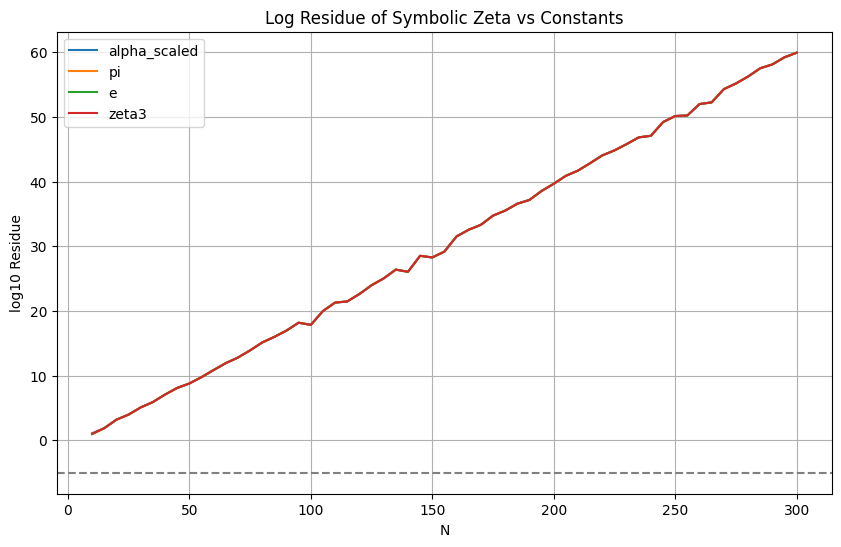

In [5]:
def symbolic_zeta_phi(N, s):
    total = mpf(0)
    for n in range(1, N + 1):
        term = liouville(n) / (n**s) * (phi ** n)
        total += term
    return total

targets = {
    'alpha_scaled': alpha_scaled,
    'pi': pi,
    'e': e,
    'zeta3': mp.zeta(3)
}

s = 1.0
N_range = range(10, 301, 5)
results = {k: [] for k in targets}

for N in N_range:
    val = symbolic_zeta_phi(N, s)
    for name, target in targets.items():
        diff = abs(val - target)
        results[name].append((N, diff))

plt.figure(figsize=(10, 6))
for name, data in results.items():
    Ns, diffs = zip(*data)
    plt.plot(Ns, [mp.log10(d) for d in diffs], label=name) # Use mp.log10 for mpf objects
plt.axhline(mp.log10(1e-5), color='gray', ls='--') # Use mp.log10 for mpf objects
plt.title("Log Residue of Symbolic Zeta vs Constants")
plt.xlabel("N")
plt.ylabel("log10 Residue")
plt.legend()
plt.grid(True)
plt.show()

## 2️⃣ Binary Window Convergence to α

In [ ]:
binary_windows = []
window_decimal_vals = []
diffs = []

for i in range(8, 33):
    bstr = '0b' + '1' * i
    val = BitArray(bstr).float
    binary_windows.append(bstr)
    window_decimal_vals.append(val)
    diffs.append(abs(val - alpha_scaled))

plt.figure(figsize=(10, 5))
plt.plot(range(8, 33), diffs)
plt.axhline(y=0, color='gray', linestyle='--')
plt.title("Distance of Binary Windows to α_scaled")
plt.xlabel("Bit length")
plt.ylabel("|Window - α_scaled|")
plt.grid(True)
plt.show()

## 3️⃣ Symbolic Entropy Drop at α Threshold

In [ ]:
def shannon_entropy(bits):
    counts = Counter(bits)
    total = len(bits)
    return -sum((count / total) * log(count / total, 2) for count in counts.values())

entropies = []
bit_vals = []
for i in range(8, 33):
    bstr = '1' * i
    entropy = shannon_entropy(bstr)
    entropies.append(entropy)
    val = int(bstr, 2) / (2 ** i)
    bit_vals.append(val)

plt.figure(figsize=(10, 5))
plt.plot(bit_vals, entropies)
plt.axvline(alpha_scaled, color='red', linestyle='--', label='α_scaled')
plt.title("Entropy vs Decimal Value of Binary Window")
plt.xlabel("Decimal Value")
plt.ylabel("Entropy")
plt.grid(True)
plt.legend()
plt.show()

## 4️⃣ Symbolic Precession Analogy Simulation

In [ ]:
gamma = 1.0
steps = 50
x_vals = []
delta_vals = []
s_vals = []

x_n = mpf(0.5)

for n in range(1, steps + 1):
    phi_n = phi ** n % 1
    delta = abs(phi_n - x_n)
    s_n = int(n % 2 == 0)
    V = (x_n - alpha_scaled) ** 2
    L = delta**2 + gamma * s_n**2 - V
    x_n = x_n - 0.01 * L
    x_vals.append(float(x_n))
    delta_vals.append(float(delta))
    s_vals.append(s_n)

plt.figure(figsize=(10, 5))
plt.plot(range(steps), x_vals, label='x_n')
plt.axhline(float(alpha_scaled), color='red', linestyle='--', label='α_scaled')
plt.title("Symbolic Orbital Motion Toward α")
plt.xlabel("Step")
plt.ylabel("x_n")
plt.legend()
plt.grid(True)
plt.show()

## 5️⃣ Duda Comparison: Periodicity in Symbolic Rebounds

In [ ]:
angles = []
for k in range(1, 13):
    rebound = abs((k * 360) % 729 - 360)
    angles.append((k, rebound))

plt.figure(figsize=(10, 5))
plt.bar(*zip(*angles))
plt.title("Symbolic Angular Residue vs 729 (Duda-like test)")
plt.xlabel("Rebound Iteration k")
plt.ylabel("|(k*360) mod 729 - 360|")
plt.grid(True)
plt.show()

## ✅ All tests complete. α's behavior in symbolic space has been scanned across entropy, residues, periodicity, and recursive closure thresholds.